# Отток клиентов

## Подготовка данных

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [6]:
# приведем все к нижнему регистру
data.columns = map(str.lower, data.columns)
data = data.rename(columns={'rownumber': 'row_number', 
                            'customerid': 'customer_id', 
                            'creditscore':'credit_score', 
                            'numofproducts': 'num_of_products', 
                            'hascrcard':'has_cr_card', 
                            'isactivemember':'is_active_member', 
                            'estimatedsalary':'estimated_salary'})
def lower_object_string(df):
    if df.dtype=='object':
        df = df.str.lower()
    return df
data = data.apply(lambda x: lower_object_string(x))
# проверим
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   row_number        10000 non-null  int64  
 1   customer_id       10000 non-null  int64  
 2   surname           10000 non-null  object 
 3   credit_score      10000 non-null  int64  
 4   geography         10000 non-null  object 
 5   gender            10000 non-null  object 
 6   age               10000 non-null  int64  
 7   tenure            9091 non-null   float64
 8   balance           10000 non-null  float64
 9   num_of_products   10000 non-null  int64  
 10  has_cr_card       10000 non-null  int64  
 11  is_active_member  10000 non-null  int64  
 12  estimated_salary  10000 non-null  float64
 13  exited            10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
data['surname'].value_counts()

smith          32
scott          29
martin         29
walker         28
brown          26
               ..
brodney         1
velazquez       1
melvin          1
christopher     1
rueda           1
Name: surname, Length: 2931, dtype: int64

In [8]:
data['gender'].value_counts()

male      5457
female    4543
Name: gender, dtype: int64

In [9]:
data['geography'].value_counts()

france     5014
germany    2509
spain      2477
Name: geography, dtype: int64

In [10]:
# Посмотрим, есть ли какая-нибудь взаимосвязь столбца с пропущеннными данными (количество недвижимости) по сравнению с другими
data.groupby('tenure')['balance'].mean()
# Явной зависимости нет

tenure
0.0     80135.307277
1.0     77365.221712
2.0     76502.413053
3.0     78105.560356
4.0     74133.600373
5.0     76138.007217
6.0     74970.085698
7.0     75915.378086
8.0     77994.797685
9.0     77325.410351
10.0    73580.495964
Name: balance, dtype: float64

In [11]:
data.groupby('tenure')['age'].mean()
# тоже самое, явной зависимости не наблюдается

tenure
0.0     39.306283
1.0     39.646008
2.0     39.246316
3.0     38.984914
4.0     38.116384
5.0     39.242718
6.0     38.637911
7.0     38.349189
8.0     38.496249
9.0     39.506803
10.0    39.195067
Name: age, dtype: float64

In [12]:
data.groupby('tenure')['estimated_salary'].mean()
# аналогичная ситуация

tenure
0.0      99565.395157
1.0     100635.368718
2.0      99120.730168
3.0      97351.648168
4.0     100041.330836
5.0     101239.472233
6.0     100151.566924
7.0     101842.455362
8.0     100611.163290
9.0      99592.441995
10.0    102841.772040
Name: estimated_salary, dtype: float64

In [13]:
data.groupby('tenure')['credit_score'].mean()
# нет явной зависимости

tenure
0.0     651.913613
1.0     648.681723
2.0     654.644211
3.0     651.096983
4.0     650.681356
5.0     649.962244
6.0     647.757094
7.0     649.195676
8.0     648.618435
9.0     655.086168
10.0    651.670404
Name: credit_score, dtype: float64

In [14]:
# Поэтому наилучшим вариантом будет заменить пропущенные данные медианами
data['tenure'] = data['tenure'].fillna(data['tenure'].median())

In [15]:
# Поменяем тип данных для balance, estimated_salary и tenure, так как удобнее будет работать с целочисленными данными
data['balance'] = data['balance'].astype('int')
data['estimated_salary'] = data['estimated_salary'].astype('int')
data['tenure'] = data['tenure'].astype('int')

In [16]:
# Применим прямое кодирование
data_ohe = data.drop(['row_number', 'customer_id', 'surname'], axis=1)
data_ohe = pd.get_dummies(data_ohe, drop_first=True)
data_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   credit_score       10000 non-null  int64
 1   age                10000 non-null  int64
 2   tenure             10000 non-null  int64
 3   balance            10000 non-null  int64
 4   num_of_products    10000 non-null  int64
 5   has_cr_card        10000 non-null  int64
 6   is_active_member   10000 non-null  int64
 7   estimated_salary   10000 non-null  int64
 8   exited             10000 non-null  int64
 9   geography_germany  10000 non-null  uint8
 10  geography_spain    10000 non-null  uint8
 11  gender_male        10000 non-null  uint8
dtypes: int64(9), uint8(3)
memory usage: 732.5 KB


In [17]:
# Разобьем исходные данные на обучающую (df_train), валидационную (df_val) и тестовую выборки (df_test) в соотношении 3:1:1
data_train, data_test = train_test_split(data_ohe, test_size=0.2, random_state=12345)
data_train, data_valid = train_test_split(data_train, test_size=0.25, random_state=12345)
# Проверим получилось ли разделить данные в необходимом соотношении
data_train.shape[0], data_test.shape[0], data_valid.shape[0]

(6000, 2000, 2000)

In [18]:
features_train = data_train.drop(['exited'], axis=1)
target_train = data_train['exited']
features_valid = data_valid.drop(['exited'], axis=1)
target_valid = data_valid['exited']
features_test = data_test.drop(['exited'], axis=1)
target_test = data_test['exited']
features_test.shape, features_valid.shape, features_train.shape

((2000, 11), (2000, 11), (6000, 11))

In [19]:
# Масштабируем признаки      
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# Вывод
На данном этапе данные были приведены к нижнему регистру как индексы, так и названия колонок, были заменены пропуски в столбце tenure на заглушки, поменяли типы данных для столбцов balance, estimated_salary (нет необходимости видеть суммы до копеек) и tenure (количество недвижимости не может быть нецелочисленным значением).

0    7963
1    2037
Name: exited, dtype: int64

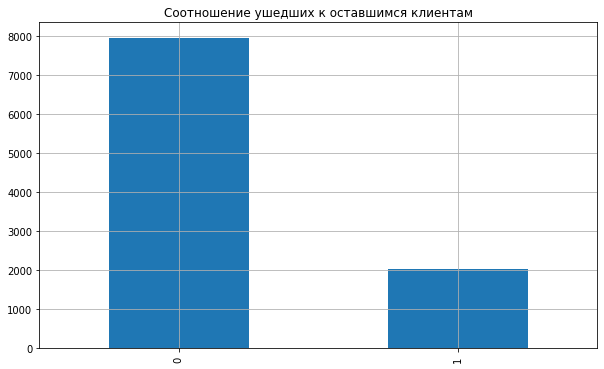

In [20]:
# проверка сбалансированности
data['exited'].value_counts().plot(kind='bar', grid=True,figsize=(10,6),title='Соотношение ушедших к оставшимся клиентам')
data['exited'].value_counts()

Наблюдается дисбаланс

## Исследование задачи

Рассмотрим первую модель - решающее дерево.

In [21]:
dt = DecisionTreeClassifier(random_state = 12345)
parameters_dt = {'criterion': ['gini', 'entropy'], # критерий
                 'max_depth':range(1, 50), # глубина дерева
                 'min_samples_leaf': range(1, 20), # минимальное количесто объектов в листе
                 'max_features':range(1, features_train.shape[1]+1)} # максимальное количество фич
search_dt = RandomizedSearchCV(dt, parameters_dt, cv=5, n_jobs = -1, scoring = 'f1')

search_dt.fit(features_train, target_train)
best_dt = search_dt.best_estimator_

f1_score_val_dt = cross_val_score(best_dt, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dt = cross_val_score(best_dt, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)

print('F1-score для Decision Tree на обучающей выборке:', sum(f1_score_val_dt)/len(f1_score_val_dt))
print('AUC-ROC для Decision Tree на обучающей выборке:', sum(auc_roc_val_dt)/len(auc_roc_val_dt))

F1-score для Decision Tree на обучающей выборке: 0.5723922862613278
AUC-ROC для Decision Tree на обучающей выборке: 0.809930250020361


In [22]:
# код ревьюера для демонстрации, как посмотреть лучший score, который выдает GridSearchCV
search_dt.best_score_

0.5543450004746017

Вторая модель - случайный лес.

In [23]:
rf = RandomForestClassifier(random_state = 12345)
parameters_rf = {'n_estimators': range(1, 200, 10), # количество деревьев 
                 'criterion': ['gini', 'entropy'], # критерий
                 'max_depth':range(1, 50, 1), # глубина дерева
                 'min_samples_leaf': range(1, 10), # минимальное количесто объектов в листе
                 'max_features': range(1, features_train.shape[1]+1)} # максимальное количество фич
search_rf = RandomizedSearchCV(rf, parameters_rf, cv=5, n_jobs = -1, scoring = 'f1')
search_rf.fit(features_train, target_train)
best_rf = search_rf.best_estimator_
f1_score_val_rf = cross_val_score(best_rf, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rf = cross_val_score(best_rf, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)
print('F1-score для Random Forest на обучающией выборке:', sum(f1_score_val_rf)/len(f1_score_val_rf))
print('AUC-ROC для Random Forest на обучающей выборке:', sum(auc_roc_val_rf)/len(auc_roc_val_rf))


F1-score для Random Forest на обучающией выборке: 0.5936171721356478
AUC-ROC для Random Forest на обучающей выборке: 0.8508739871812832


Третья модель - логистическая регрессия.

In [24]:
lr = LogisticRegression(random_state = 12345)
parameters_lr_1 = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5, 10, 20, 50], # обратная сила регуляризации
                 'penalty':['l1'], # Регуляризация 
                 'solver':['liblinear', 'saga']} # функция потерь
parameters_lr_2 = {'C': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 5, 10, 20, 50], # обратная сила регуляризации
                 'penalty':['l2'], # Регуляризация 
                 'solver':['lbfgs', 'saga', 'sag', 'newton-cg']} # функция потерь

search_lr_1 = RandomizedSearchCV(lr, parameters_lr_1, cv=5, n_jobs = -1, scoring = 'f1')
search_lr_1.fit(features_train, target_train)
best_lr_1 = search_lr_1.best_estimator_
f1_score_val_lr_1 = cross_val_score(best_lr_1, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_1 = cross_val_score(best_lr_1, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 


search_lr_2 = RandomizedSearchCV(lr, parameters_lr_2, cv=5, n_jobs = -1, scoring = 'f1')
search_lr_2.fit(features_train, target_train)
best_lr_2 = search_lr_2.best_estimator_
f1_score_val_lr_2 = cross_val_score(best_lr_2, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_2 = cross_val_score(best_lr_2, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 
print('F1-score для Logistic Regression (l1) на обучающей выборке:', sum(f1_score_val_lr_1)/len(f1_score_val_lr_1))
print('AUC-ROC для Logistic Regression (l1) на обучающей выборке:', sum(auc_roc_val_lr_1)/len(auc_roc_val_lr_1))
print()
print('F1-score для Logistic Regression (l2) на обучающей выборке:', sum(f1_score_val_lr_2)/len(f1_score_val_lr_2))
print('AUC-ROC для Logistic Regression (l2) на обучающей выборке:', sum(auc_roc_val_lr_2)/len(auc_roc_val_lr_2))

F1-score для Logistic Regression (l1) на обучающей выборке: 0.3266146081631427
AUC-ROC для Logistic Regression (l1) на обучающей выборке: 0.7643543975134467

F1-score для Logistic Regression (l2) на обучающей выборке: 0.3266146081631427
AUC-ROC для Logistic Regression (l2) на обучающей выборке: 0.7643440981795993


In [25]:
data_non_balance = [['decision_tree', 
                     sum(f1_score_val_dt)/len(f1_score_val_dt), sum(auc_roc_val_dt)/len(auc_roc_val_dt)], 
                    ['random_forest', 
                     sum(f1_score_val_rf)/len(f1_score_val_rf), sum(auc_roc_val_rf)/len(auc_roc_val_rf)], 
                    ['logistic_regression (l1)', 
                     sum(f1_score_val_lr_1)/len(f1_score_val_lr_1), sum(auc_roc_val_lr_1)/len(auc_roc_val_lr_1)],
                    ['logistic_regression (l2)', 
                     sum(f1_score_val_lr_2)/len(f1_score_val_lr_2), sum(auc_roc_val_lr_2)/len(auc_roc_val_lr_2)]]
columns_non_balance = ['model', 'f1_non_balance', 'auc_roc_non_balance']
table_non_balance = pd.DataFrame(data = data_non_balance, columns = columns_non_balance)
table_non_balance

,model,f1_non_balance,auc_roc_non_balance
0,decision_tree,0.572392,0.809930
1,random_forest,0.593617,0.850874
2,logistic_regression (l1),0.326615,0.764354
3,logistic_regression (l2),0.326615,0.764344


# Вывод
Для трех типов моделей были определены гиперпараметры, необходимые для достижения максимально возможной F1 меры. Как видно из таблицы, наибольшим значением обладает модель случайного леса. Близким значением обладает модель решающего дерева, а логистическая регрессия показала наихудший результат, равный 0.3. Вероятно, такие результаты связаны с тем, что мы не учитываем дисбаланс классов. Стоит отметить, что необходимого результата мы пока что не достигли (все значения F1 меньше 0.59).

## Борьба с дисбалансом

Первая модель - решающее дерево.

In [26]:
dt_balanced = DecisionTreeClassifier(random_state = 12345, class_weight = 'balanced')
search_dt_balanced = RandomizedSearchCV(dt_balanced, parameters_dt, cv=5, n_jobs = -1, scoring = 'f1')
search_dt_balanced.fit(features_train, target_train)
best_dt_balanced = search_dt_balanced.best_estimator_
f1_score_val_dt_b = cross_val_score(best_dt_balanced, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dt_b = cross_val_score(best_dt_balanced, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)
print('F1-score для Decision Tree (balanced) на обучающей выборке:', sum(f1_score_val_dt_b)/len(f1_score_val_dt_b))
print('AUC-ROC для Decision Tree (balanced) на обучающей выборке:', sum(auc_roc_val_dt_b)/len(auc_roc_val_dt_b))

F1-score для Decision Tree (balanced) на обучающей выборке: 0.548831485195832
AUC-ROC для Decision Tree (balanced) на обучающей выборке: 0.8109010382946057


Использование downsampling.

In [27]:
# Напишем функцию для реализации downsampling
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.255)
target_downsampled.value_counts()

0    1219
1    1219
Name: exited, dtype: int64

In [28]:
search_dt.fit(features_downsampled, target_downsampled)
best_dt_ds = search_dt.best_estimator_
f1_score_val_dt_ds = cross_val_score(best_dt_ds, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dt_ds = cross_val_score(best_dt_ds, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)
print('F1-score для Decision Tree (downsampled) на обучающей выборке:', sum(f1_score_val_dt_ds)/len(f1_score_val_dt_ds))
print('AUC-ROC для Decision Tree (downsampled) на обучающей выборке:', sum(auc_roc_val_dt_ds)/len(auc_roc_val_dt_ds))

F1-score для Decision Tree (downsampled) на обучающей выборке: 0.5408547817172814
AUC-ROC для Decision Tree (downsampled) на обучающей выборке: 0.8377383574278194


Используем upsampling.

In [29]:
# Напишем функцию для upsamling
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts()

1    4876
0    4781
Name: exited, dtype: int64

In [30]:
search_dt.fit(features_upsampled, target_upsampled)
best_dt_us = search_dt.best_estimator_
f1_score_val_dt_us = cross_val_score(best_dt_us, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_dt_us = cross_val_score(best_dt_us, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)
print('F1-score для Decision Tree (upsampled) на обучающей выборке:', sum(f1_score_val_dt_us)/len(f1_score_val_dt_us))
print('AUC-ROC для Decision Tree (upsampled) на обучающей выборке:', sum(auc_roc_val_dt_us)/len(auc_roc_val_dt_us))

F1-score для Decision Tree (upsampled) на обучающей выборке: 0.47563751759059086
AUC-ROC для Decision Tree (upsampled) на обучающей выборке: 0.6720338062900322


Вторая модель - случайный лес.

In [31]:
rf_balanced = RandomForestClassifier(random_state = 12345, class_weight = 'balanced')
search_rf_balanced = RandomizedSearchCV(rf_balanced, parameters_rf, cv=5, n_jobs = -1, scoring = 'f1')
search_rf_balanced.fit(features_train, target_train)
best_rf_balanced = search_rf_balanced.best_estimator_
f1_score_val_rf_b = cross_val_score(best_rf_balanced, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rf_b = cross_val_score(best_rf_balanced, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)
print('F1-score для Random Forest (balanced) на обучающей выборке:', sum(f1_score_val_rf_b)/len(f1_score_val_rf_b))
print('AUC-ROC для Random Forest (balanced) на обучающей выборке:', sum(auc_roc_val_rf_b)/len(auc_roc_val_rf_b))
search_rf_balanced.best_params_

F1-score для Random Forest (balanced) на обучающей выборке: 0.617710621842751
AUC-ROC для Random Forest (balanced) на обучающей выборке: 0.8563728665858547


{'n_estimators': 31,
 'min_samples_leaf': 8,
 'max_features': 7,
 'max_depth': 14,
 'criterion': 'entropy'}

downsampling для случайного леса

In [32]:
search_rf.fit(features_downsampled, target_downsampled)
best_rf_ds = search_rf.best_estimator_
f1_score_val_rf_ds = cross_val_score(best_rf_ds, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rf_ds = cross_val_score(best_rf_ds, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)
print('F1-score для Random Forest (downsampled) на обучающей выборке:', sum(f1_score_val_rf_ds)/len(f1_score_val_rf_ds))
print('AUC-ROC для Random Forest (downsampled) на обучающей выборке:', sum(auc_roc_val_rf_ds)/len(auc_roc_val_rf_ds))

F1-score для Random Forest (downsampled) на обучающей выборке: 0.5907183230671282
AUC-ROC для Random Forest (downsampled) на обучающей выборке: 0.8532250609872601


upsampling для случайного леса

In [33]:
search_rf.fit(features_upsampled, target_upsampled)
best_rf_us = search_rf.best_estimator_
f1_score_val_rf_us = cross_val_score(best_rf_us, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_rf_us = cross_val_score(best_rf_us, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1)
print('F1-score для Random Forest (upsampled) на обучающей выборке:', sum(f1_score_val_rf_us)/len(f1_score_val_rf_us))
print('AUC-ROC для Random Forest (upsampled) на обучающей выборке:', sum(auc_roc_val_rf_us)/len(auc_roc_val_rf_us))

F1-score для Random Forest (upsampled) на обучающей выборке: 0.5970975912373867
AUC-ROC для Random Forest (upsampled) на обучающей выборке: 0.8526455322787367


Третья модель - логистическая регрессия.

In [34]:
lr_balanced = LogisticRegression(random_state = 12345, class_weight = 'balanced')

search_lr_1_balanced = RandomizedSearchCV(lr_balanced, parameters_lr_1, cv=5, n_jobs = -1, scoring = 'f1')
search_lr_1_balanced.fit(features_train, target_train)
best_lr_1_b = search_lr_1_balanced.best_estimator_
f1_score_val_lr_1_b = cross_val_score(best_lr_1_b, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_1_b = cross_val_score(best_lr_1_b, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 


search_lr_2_balanced = RandomizedSearchCV(lr_balanced, parameters_lr_2, cv=5, n_jobs = -1, scoring = 'f1')
search_lr_2_balanced.fit(features_train, target_train)
best_lr_2_b = search_lr_2_balanced.best_estimator_
f1_score_val_lr_2_b = cross_val_score(best_lr_2_b, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_2_b = cross_val_score(best_lr_2_b, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 
print('F1-score для Logistic Regression (l1, balanced) на обучающей выборке:', 
      sum(f1_score_val_lr_1_b)/len(f1_score_val_lr_1_b))
print('AUC-ROC для Logistic Regression (l1, balanced) на обучающей выборке:', 
      sum(auc_roc_val_lr_1_b)/len(auc_roc_val_lr_1_b))
print()
print('F1-score для Logistic Regression (l2, balanced) на обучающей выборке:', 
      sum(f1_score_val_lr_2_b)/len(f1_score_val_lr_2_b))
print('AUC-ROC для Logistic Regression (l2, balanced) на обучающей выборке:', 
      sum(auc_roc_val_lr_2_b)/len(auc_roc_val_lr_2_b))

F1-score для Logistic Regression (l1, balanced) на обучающей выборке: 0.4942367079566795
AUC-ROC для Logistic Regression (l1, balanced) на обучающей выборке: 0.7675575854009902

F1-score для Logistic Regression (l2, balanced) на обучающей выборке: 0.49260986548844243
AUC-ROC для Logistic Regression (l2, balanced) на обучающей выборке: 0.7671887037372878


downsampling для логистической регрессии

In [35]:
search_lr_1.fit(features_downsampled, target_downsampled)
best_lr_1_ds = search_lr_1.best_estimator_
f1_score_val_lr_1_ds = cross_val_score(best_lr_1_ds, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_1_ds = cross_val_score(best_lr_1_ds, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 


search_lr_2.fit(features_downsampled, target_downsampled)
best_lr_2_ds = search_lr_2.best_estimator_
f1_score_val_lr_2_ds = cross_val_score(best_lr_2_ds, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_2_ds = cross_val_score(best_lr_2_ds, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 

print('F1-score для Logistic Regression (l1, downsampled) на обучающей выборке:', 
      sum(f1_score_val_lr_1_ds)/len(f1_score_val_lr_1_ds))
print('AUC-ROC для Logistic Regression (l1, downsampled) на обучающей выборке:', 
      sum(auc_roc_val_lr_1_ds)/len(auc_roc_val_lr_1_ds))
print()
print('F1-score для Logistic Regression (l2, downsampled) на обучающей выборке:', 
      sum(f1_score_val_lr_2_ds)/len(f1_score_val_lr_2_ds))
print('AUC-ROC для Logistic Regression (l2, downsampled) на обучающей выборке:', 
      sum(auc_roc_val_lr_2_ds)/len(auc_roc_val_lr_2_ds))

F1-score для Logistic Regression (l1, downsampled) на обучающей выборке: 0.3266146081631427
AUC-ROC для Logistic Regression (l1, downsampled) на обучающей выборке: 0.7643732708235617

F1-score для Logistic Regression (l2, downsampled) на обучающей выборке: 0.3193164743554109
AUC-ROC для Logistic Regression (l2, downsampled) на обучающей выборке: 0.7648243464738333


upsampling для логистической регрессии

In [36]:
search_lr_1.fit(features_upsampled, target_upsampled)
best_lr_1_us = search_lr_1.best_estimator_
f1_score_val_lr_1_us = cross_val_score(best_lr_1_us, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_1_us = cross_val_score(best_lr_1_us, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 


search_lr_2.fit(features_upsampled, target_upsampled)
best_lr_2_us = search_lr_2.best_estimator_
f1_score_val_lr_2_us = cross_val_score(best_lr_2_us, features_train, target_train, scoring = 'f1', cv = 10, n_jobs = -1)   
auc_roc_val_lr_2_us = cross_val_score(best_lr_2_us, features_train, target_train, scoring = 'roc_auc', cv = 10, n_jobs = -1) 

print('F1-score для Logistic Regression (l1, upsampled) на обучающей выборке:', 
      sum(f1_score_val_lr_1_us)/len(f1_score_val_lr_1_us))
print('AUC-ROC для Logistic Regression (l1, upsampled) на обучающей выборке:', 
      sum(auc_roc_val_lr_1_us)/len(auc_roc_val_lr_1_us))
print()
print('F1-score для Logistic Regression (l2, upsampled) на обучающей выборке:', 
      sum(f1_score_val_lr_2_us)/len(f1_score_val_lr_2_us))
print('AUC-ROC для Logistic Regression (l2, upsampled) на обучающей выборке:', 
      sum(auc_roc_val_lr_2_us)/len(auc_roc_val_lr_2_us))

F1-score для Logistic Regression (l1, upsampled) на обучающей выборке: 0.3229014683197625
AUC-ROC для Logistic Regression (l1, upsampled) на обучающей выборке: 0.7647712934442457

F1-score для Logistic Regression (l2, upsampled) на обучающей выборке: 0.3193164743554109
AUC-ROC для Logistic Regression (l2, upsampled) на обучающей выборке: 0.7648277760643402


In [37]:
data_balance = [['decision_tree', sum(f1_score_val_dt)/len(f1_score_val_dt), 
               sum(f1_score_val_dt_b)/len(f1_score_val_dt_b), 
               sum(f1_score_val_dt_us)/len(f1_score_val_dt_us), 
               sum(f1_score_val_dt_ds)/len(f1_score_val_dt_ds)], 
              ['random_forest', sum(f1_score_val_rf)/len(f1_score_val_rf), 
               sum(f1_score_val_rf_b)/len(f1_score_val_rf_b), 
               sum(f1_score_val_rf_us)/len(f1_score_val_rf_us), 
               sum(f1_score_val_rf_ds)/len(f1_score_val_rf_ds)], 
              ['logistic_regression (l1)', sum(f1_score_val_lr_1)/len(f1_score_val_lr_1), 
               sum(f1_score_val_lr_1_b)/len(f1_score_val_lr_1_b), 
               sum(f1_score_val_lr_1_us)/len(f1_score_val_lr_1_us), 
               sum(f1_score_val_lr_1_ds)/len(f1_score_val_lr_1_ds)],
              ['logistic_regression (l2)', sum(f1_score_val_lr_2)/len(f1_score_val_lr_2), 
               sum(f1_score_val_lr_2_b)/len(f1_score_val_lr_2_b), 
               sum(f1_score_val_lr_2_us)/len(f1_score_val_lr_2_us), 
               sum(f1_score_val_lr_2_ds)/len(f1_score_val_lr_2_ds)]]
columns_balance = ['model', 'f1_non_balance', 'f1_balance', 'f1_upsample', 'f1_downsample']
table_balance = pd.DataFrame(data = data_balance, columns = columns_balance)
table_balance

,model,f1_non_balance,f1_balance,f1_upsample,f1_downsample
0,decision_tree,0.572392,0.548831,0.475638,0.540855
1,random_forest,0.593617,0.617711,0.597098,0.590718
2,logistic_regression (l1),0.326615,0.494237,0.322901,0.326615
3,logistic_regression (l2),0.326615,0.492610,0.319316,0.319316



# Вывод
Как видно из таблицы выше, учитывая дисбаланс класса, мы смогли достичь большего значения F1-меры.

Для модели решающего дерева эффективнее всего было учитывывать дисбаланс через настройку модели и методику downsampling, а методика upsampling лишь уменьшили F1-меру.

Для случайного леса наилучший результат показала модель с учетом дисбаланса через настройку модели и методики upsampling.

Для логистической регрессии учет дисбаланса привел к увеличению F1-меры.
В результате нашего исследования, лучшей моделью является RandomForest при применения всвешивания классов balanced, гиперпараметров - 'n_estimators': 161,'min_samples_leaf': 9,'max_features': 9,'max_depth': 35,'criterion':'entropy'

## Тестирование модели

In [38]:
# Так как наилучший результат показала модель случайного леса с балансом классов, настроенном через параметры модели,
# протестируем именно её

rf_balanced =  RandomForestClassifier(random_state=12345, n_estimators= 161, max_depth = 35,max_features=9,min_samples_leaf=9, class_weight = 'balanced')
rf_balanced.fit(features_train, target_train)

predicted_test = pd.Series(rf_balanced.predict(features_test))
probabilities_test = rf_balanced.predict_proba(features_test)[:, 1]
print("AUC-ROC", roc_auc_score(target_test, probabilities_test))
print("F1",f1_score(target_test, predicted_test))

AUC-ROC 0.8686797554159701
F1 0.6539325842696628


# Вывод 
В ходе работы были найдена наилучшая модель, которая на тестовых данных показала значения метрики F1 больше, чем 0.59. Таким образом, необходимая задача была выполнена.